In [ ]:
!pip install numpy

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from typing import Callable, Union

from scipy.optimize import minimize

In [89]:
data = np.loadtxt("dec_lengths.txt")
data = np.sort(data)

(array([2.8212e+04, 1.5450e+04, 1.0870e+04, 8.6480e+03, 6.8600e+03,
        5.4540e+03, 4.5760e+03, 3.7530e+03, 3.1140e+03, 2.3770e+03,
        1.9570e+03, 1.6460e+03, 1.3730e+03, 1.0650e+03, 8.4400e+02,
        7.4100e+02, 5.7200e+02, 4.6400e+02, 3.7500e+02, 2.8500e+02,
        2.7500e+02, 2.0800e+02, 1.8100e+02, 1.3400e+02, 1.0800e+02,
        9.3000e+01, 6.1000e+01, 6.3000e+01, 4.3000e+01, 5.1000e+01,
        2.9000e+01, 1.6000e+01, 2.2000e+01, 1.3000e+01, 1.5000e+01,
        7.0000e+00, 9.0000e+00, 1.0000e+01, 4.0000e+00, 4.0000e+00,
        3.0000e+00, 3.0000e+00, 4.0000e+00, 1.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([6.56179931e-02, 8.63201621e+02, 1.72633762e+03, 2.58947363e+03,
        3.45260963e+03, 4.31574563e+03, 5.17888163e+03, 6.04201764e+03,
        6.90515364e+03, 7.76828964e+03, 8.63142564e+03, 9.49456165e+03,
        1.03576976e+04, 1.12208337e+04, 1.20839697e+04, 1.29471057e+04,
        1.38102417e+04, 1.4673

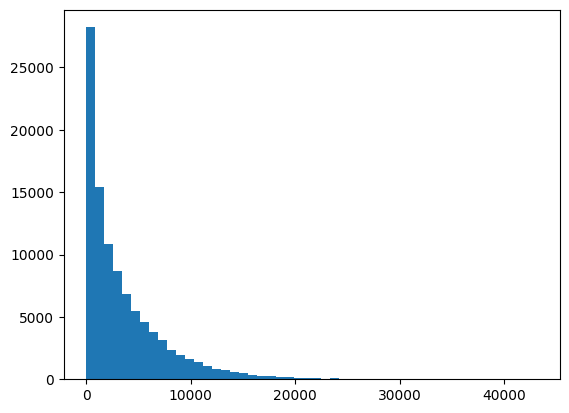

In [90]:

def pdf(y2: float) -> Union[float, np.ndarray]:
  y1 = 1/4188.0
  p1 = y1*np.exp(-y1*data)
  p2 = y2*np.exp(-y2*data)
  return 0.84*p1 + 0.16*p2

In [91]:
print(-np.sum(np.log(pdf(0.1))))
print(-np.sum(np.log(pdf(0.01))))

931907.0851533174
921570.7690789016


In [92]:
def neg_log_likelihood_gauss(y2) -> float:
    if (y2>=0.0):
        return -np.sum(np.log(pdf(y2)))
    else:
        return np.infty

bnd = (0.0, None)
res_neg_log = minimize(neg_log_likelihood_gauss,method='Nelder-Mead', x0=(0.1))
print(1/res_neg_log.x)
res_neg_log

[562.2512011]


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 916722.0338354352
             x: [ 1.779e-03]
           nit: 24
          nfev: 48
 final_simplex: (array([[ 1.779e-03],
                       [ 1.778e-03]]), array([ 9.167e+05,  9.167e+05]))

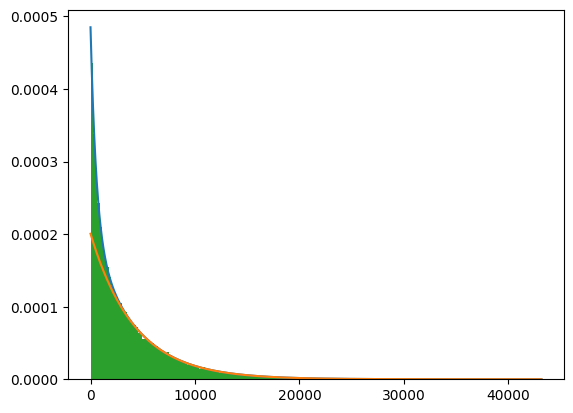

In [100]:
plt.plot(data,pdf(res_neg_log.x))
plt.plot(data,pdf(mu_kaons))
plt.hist(data,bins=200, density=True)
plt.show()


## Calculating the $\mu_{kaons}$ from $\mu_{total}$ and $\mu_{pions}$
We have the following means
\begin{equation}
\mu_{kaons}\frac{1}{n_{kaons}}\sum_i x_i \qquad \mu_{pions}\frac{1}{n_{pions}}\sum_i x_i, \qquad \mu_{total}=\frac{1}{n_{pions}+n_{kaons}}\sum_i x_i
\end{equation}


Given that we already know $\mu_{pion}$, $\mu_{total}$ and the ration f $n_{pions}$ and $n_{kaons}$ we get 
 

\begin{equation}
\mu_{kaons} = \frac{(n_{kaons}+n_{pions})\mu_{total}-n_{pions}\cdot\mu_{total}}{n_{kaons}}
\end{equation}


In [23]:
mu = np.mean(data)
mu_pions = 4188
pion_tau = 2.6033*10**(-8)
byc = mu_pions/pion_tau
n_pions = 0.84*len(data)
n_kaons = 0.16*len(data)
mu_kaons = ((n_kaons+n_pions)*mu - n_pions*mu_pions)/n_kaons
mu_kaons/byc

3.3353352317517785e-09

# 


In [83]:
print(mu_kaons)
print(mu_pions)

536.564512371853
4188


In [99]:
mu_pions = 4188
pion_tau = 2.6033*10**(-8)
byc = mu_pions/pion_tau
mu_kaon = 1/res_neg_log.x
kaon_tau = mu_kaon/byc
print(pion_tau)
print(kaon_tau)



2.6033e-08
[3.49500609e-09]


In [118]:
s1 = 562.2512011
s2 = 4188
t1 = 1.2380*1e-8
t2 = 2.6033*1e-8
c = 299792458
v1 = s1/t1*1/(np.sqrt(1+s1**2/(t1**2*c**2)))
v2 = s2/t2*1/(np.sqrt(1+s2**2/(t2**2*c**2)))
print(v1/v2)

0.9999799503363256
